# Basic stock comparison

Example below shows a chart and a basic statistical comparison of two different stocks (Lufthansa and MTU Aero Engines).

The idea is very simple but in many cases quite helpful: let's say someone wants to invest into a stock but seems to have a stock from the same industry in their portfolio and the question is **how similar are two stocks?**. Considering a diverse investment stagegy, this information could be important.

At this point, its probably important to mention that I am neither a trader, nor do I work in the financial sector. I am simply interested in the mathematical and visual methods applied in quantitative trading and I like to experiment with these a bit.

Now, there are severval basic methods related to identifying similarities in any time series (incl. stocks).

The following code snippets are focused on 
1. a visual interpretation (using plots) and
2. basic statistical metrics as the mean, correlation coefficient, etc.


Code is generic and can be used for any comparison of two tickers.


## Get the ticker Data

We will use the handy **yfinance** library for this purpose to fetch the "close" price values for the last 200 days.

In [1]:
import numpy as np
import yfinance as yf
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.dates as matplot_dates

### common functions ###
def fetch_ticker(ticker_name):
    # fetch ticker data from yahoo finance
    return yf.Ticker(ticker_name)

def fetch_ticker_hist(ticker, duration="30d"):
    # fetch history
    return ticker.history(period=duration)

In [2]:
# define desired tickers
# Lufthansa
ticker_1 = fetch_ticker("LHA.DE")
# 
ticker_2 = fetch_ticker("MTX.F")

# fetch historical data
ticker_1_hist = fetch_ticker_hist(ticker_1, "200d")
ticker_2_hist = fetch_ticker_hist(ticker_2, "200d")

## Simple side by side plot

A very simple comparison is plotting both tickers next to each other. 

Unfortunately the insights are limited. And we might want to think about a more interesting approach for a visual comparison.

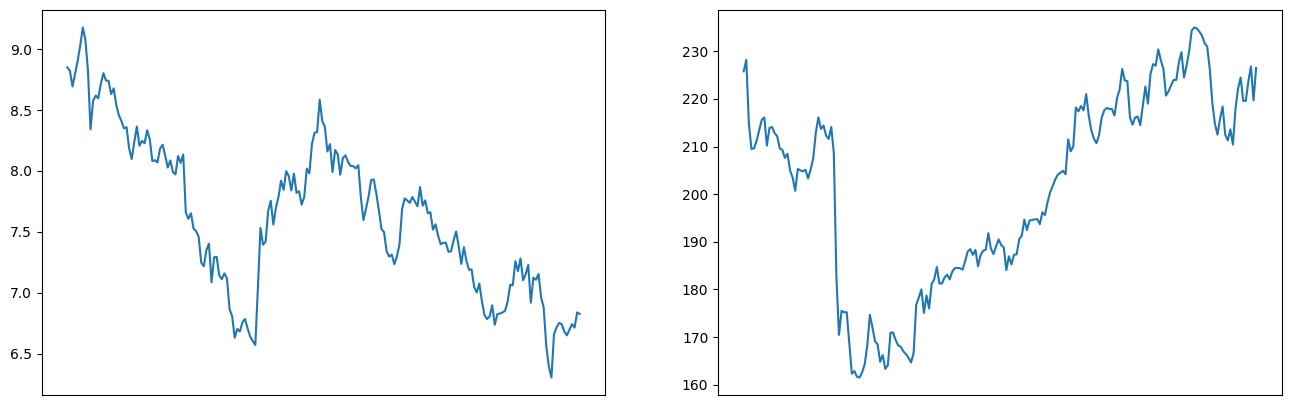

In [3]:
def plot_side_by_side(ticker_1_hist, ticker_2_hist):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    axes[0].plot(ticker_1_hist.index.strftime('%d/%m'), ticker_1_hist['Close'])
    axes[0].axes.get_xaxis().set_visible(False)
    axes[1].plot(ticker_2_hist.index.strftime('%d/%m'), ticker_2_hist['Close'])
    axes[1].axes.get_xaxis().set_visible(False)
    plt.show()

plot_side_by_side(ticker_1_hist, ticker_2_hist)

## Plot on multiple axes

A better visual comparison is achieved by displaying the tickers on the same plot. Since, however the value ranges are different we would need to use different axes for each ticker.

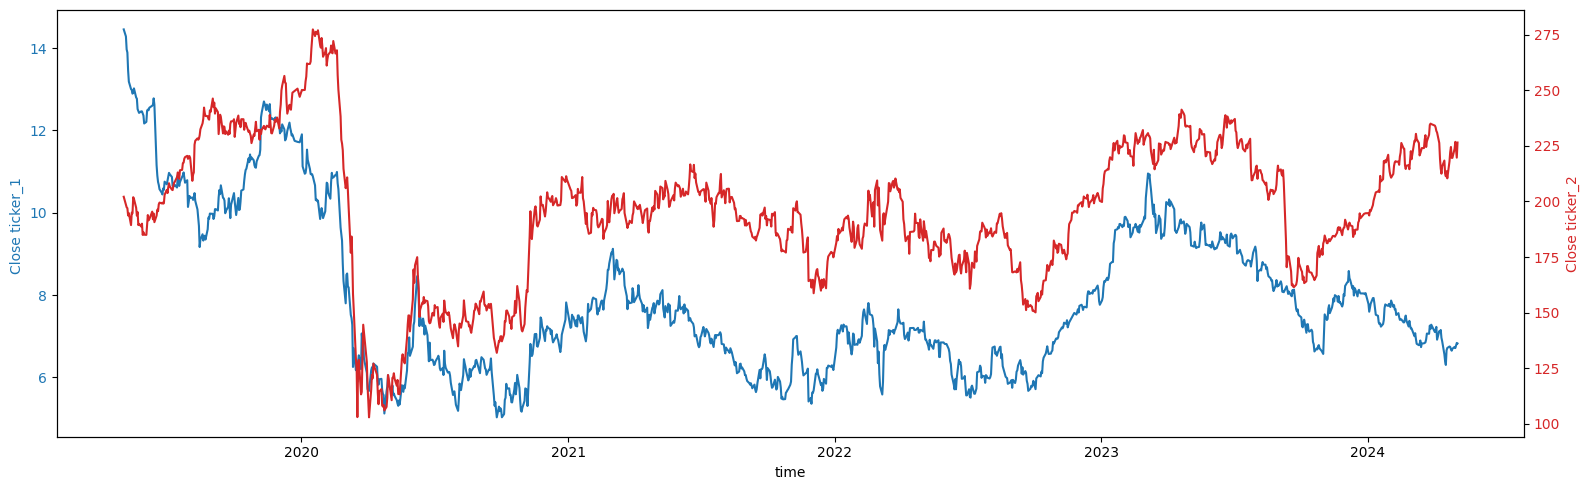

In [4]:
# fetch historical data
ticker_1_hist = fetch_ticker_hist(ticker_1, "5y")
ticker_2_hist = fetch_ticker_hist(ticker_2, "5y")

def plot_at_once(ticker_1_hist, ticker_2_hist):

    fig, ax_1 = plt.subplots(figsize=(16,5))

    color = 'tab:blue'
    ax_1.set_xlabel('time')
    ax_1.set_ylabel('Close ticker_1 ', color=color)
    ax_1.plot(ticker_1_hist.index, ticker_1_hist['Close'], color=color)
    ax_1.tick_params(axis='y', labelcolor=color)

    ax_2 = ax_1.twinx() 

    color = 'tab:red'
    ax_2.set_ylabel('Close ticker_2', color=color) 
    ax_2.plot(ticker_2_hist.index, ticker_2_hist['Close'], color=color)
    ax_2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout() 
    plt.show()

plot_at_once(ticker_1_hist, ticker_2_hist)

This definitely shows a more detailed view on both stocks and both stocks might seem similar but are they really?

Lets use better representation for similarity: the correlation coefficient.

## Non-Visual interpretation

When speaking about similarity, the word **correlation** is mentioned very often. 

In simple words, two correlated series show the following pattern: if one increases / decreases, then the other would increase / decrease as well. 
=> Now this sounds like something useful for us.

A commonly used metric expressing correlation is the **Bravais - Pearson correlation coefficient** 

$\rho_{xy} \in [-1,1]$ 

where $-1$ implies a high negative, $1$ a high positive and $0$ no correlation between two data samples.

Lets implement it (without going into details) and run it on both signals.

In [5]:
def calc_mean(sample):
    n = len(sample)
    sum_of_items = 0.0
    for item in sample:
        sum_of_items = sum_of_items + item
    return sum_of_items / n

def calc_variance(sample):
    n = len(sample)
    mean = calc_mean(sample)
    temp = 0
    for item in sample:
        temp = temp + ((item - mean)**2)
    return temp / (n)

def calc_sample_covariance(x,y):
    if len(x) != len(y):
        print(len(x))
        print(len(y))
        print("len(x) != len(y)")
        return 0
    n = len(x)
    mean_x = calc_mean(x)
    mean_y = calc_mean(y)
    temp = 0
    for i in range(n):
        temp = temp + ((y[i] - mean_y)*(x[i] - mean_x))
    return temp / (n-1)

def calc_corr_coeff(x,y):
    cov = calc_sample_covariance(x,y)
    var1 = sqrt(calc_variance(x))
    var2 = sqrt(calc_variance(y))
    return cov/(var1*var2)

In [6]:
# get variance
x = ticker_1_hist['Close']
y = ticker_2_hist['Close']

In [7]:
# get Bravais - Pearson correlation coefficient
calc_corr_coeff(x,y)

0.6999668321385061

=> this implies a hight positive correlation and hence indicates that the two stocks have similar patters w.r.t. increase / decrease.

## Linear Regression

Lets have a look on another handy tool: linear regression.

**Linear Regression** aims to "summarize" a time series into line that is defined with the slope $m$ and the bias $b$ as

$ y = m * x + b$

A very simplified explanation: we can express a time series that jiggles over time with a simple line by minimizing the squared distance between two points. 

How does it help for comparison of two stocks? Well, it generally shows the trend of a time series and we could at least idenify if this trend is simular for two stocks.

In [8]:
def plot_regression(ticker_hist, degree):

        x = np.arange(ticker_hist.index.size)
        coefs = np.poly1d(np.polyfit(x, ticker_hist['Close'], degree))

        ffit = np.poly1d(coefs)
        x_new = np.linspace(x[0], x[-1], num=len(x)*10)

        plt.plot(x_new, ffit(x_new))
        plt.plot(x, ticker_hist['Close'])


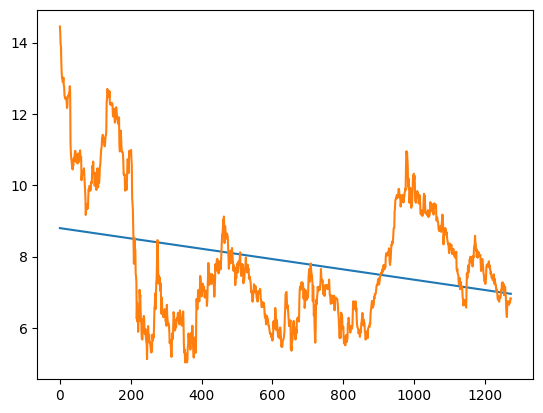

In [9]:
# regression over 10 days ticker 1
#ticker_1_hist = fetch_ticker_hist(ticker_1, "10d")
plot_regression(ticker_1_hist, 1)

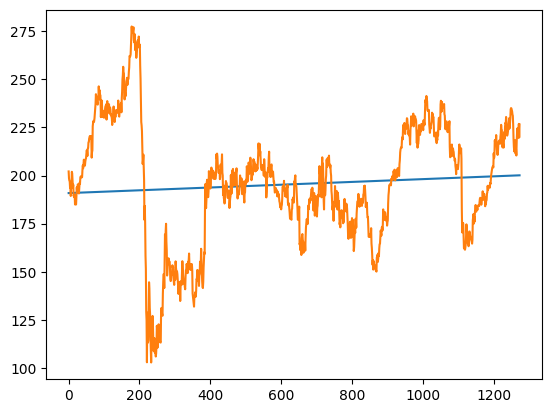

In [10]:
plot_regression(ticker_2_hist, 1)

## Summary

Even with a few lines of code, we can create interesting visualisations and metrics that could be useful for any type of quick time series analysis.